<a href="https://colab.research.google.com/github/pratiksha2409/Skin_Type_Detection/blob/main/RandomForest1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [7]:
!kaggle datasets download -d shakyadissanayake/oily-dry-and-normal-skin-types-dataset

oily-dry-and-normal-skin-types-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [8]:
import zipfile
zip_ext = zipfile.ZipFile('/content/oily-dry-and-normal-skin-types-dataset.zip', 'r')
zip_ext.extractall('/content')
zip_ext.close()

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [10]:
import os
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from PIL import Image
from sklearn import preprocessing

# Function to extract features from images
def extract_features_from_images(image_folder):
    features = []
    labels = []
    for class_name in os.listdir(image_folder):
        class_dir = os.path.join(image_folder, class_name)
        if os.path.isdir(class_dir):
            for image_name in os.listdir(class_dir):
                image_path = os.path.join(class_dir, image_name)
                if os.path.isfile(image_path):
                    # Load image and extract features (example: image size)
                    img = Image.open(image_path)
                    width, height = img.size
                    features.append([width, height])  # Example feature: image size
                    labels.append(class_name)
    return np.array(features), np.array(labels)

# Path to your dataset directories
train_dir = '/content/Oily-Dry-Skin-Types/train'
test_dir = '/content/Oily-Dry-Skin-Types/test'
validate_dir = '/content/Oily-Dry-Skin-Types/valid'

# Extract features and labels from train, test, and validate directories
train_features, train_labels = extract_features_from_images(train_dir)
test_features, test_labels = extract_features_from_images(test_dir)
validate_features, validate_labels = extract_features_from_images(validate_dir)

# Convert labels to numeric values
label_encoder = preprocessing.LabelEncoder()
train_labels_encoded = label_encoder.fit_transform(train_labels)
test_labels_encoded = label_encoder.transform(test_labels)
validate_labels_encoded = label_encoder.transform(validate_labels)

# Initialize and train Random Forest classifier
random_forest_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_classifier.fit(train_features, train_labels_encoded)

# Predict on test set
test_predictions = random_forest_classifier.predict(test_features)

# Calculate accuracy on test set
test_accuracy = accuracy_score(test_labels_encoded, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.44029850746268656


In [11]:
from sklearn.metrics import accuracy_score, f1_score

test_f1_score = f1_score(test_labels_encoded, test_predictions, average='weighted')
print("Test F1 Score:", test_f1_score)

Test F1 Score: 0.26919805119480317


In [12]:

#YOLO
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x79d1438ae920>,
 [Text(0.5646432274812502, 1.001837324948296, 'train'),
  Text(-1.0999999999999954, 1.0298943285007232e-07, 'test'),
  Text(0.5400933424974337, -0.9582792815197195, 'val')],
 [Text(0.31914617205461965, 0.5662558793186019, '33.7%'),
  Text(-0.5999999999999974, 5.617605428185762e-08, '32.7%'),
  Text(0.2945963686349638, -0.522697789919847, '33.7%')])

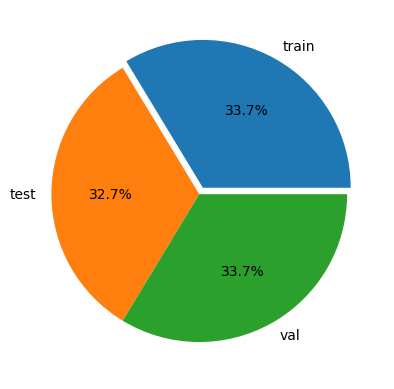

In [13]:
plt.pie([len(train_dir),len(test_dir),len(validate_dir)],labels = ['train','test','val'],autopct= '%.1f%%',explode = (0.05, 0, 0))

Found 2756 files belonging to 3 classes.


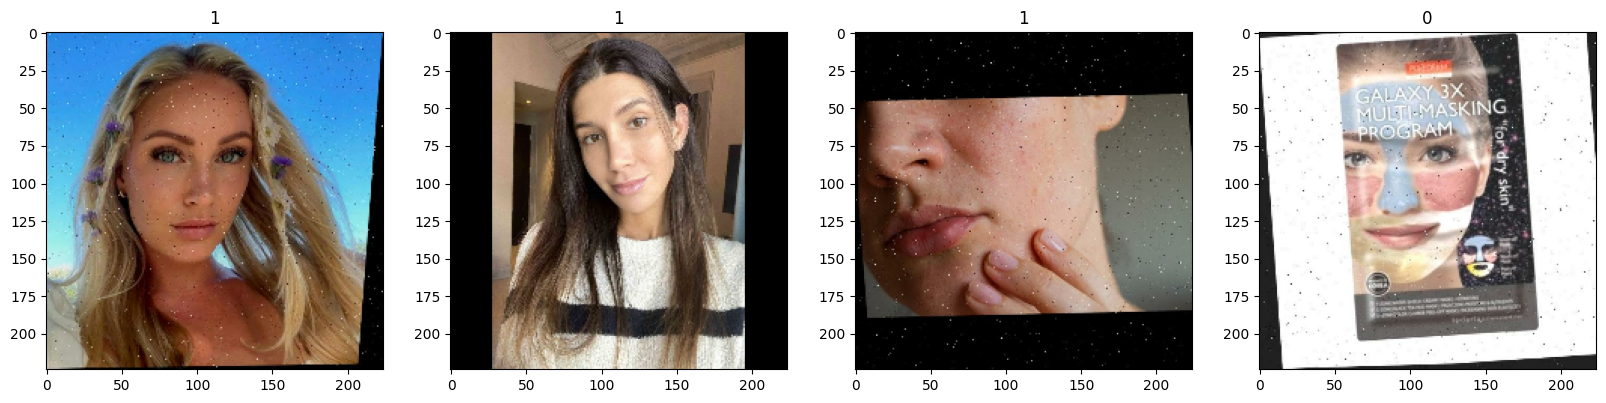

In [14]:
import matplotlib.pyplot as plt
import tensorflow as tf

# Load the train dataset using TensorFlow data loading utilities
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='int',  # Use 'int' labels for compatibility with as_numpy_iterator()
    batch_size=32,     # Adjust batch size as needed
    image_size=(224, 224),  # Adjust image size as needed
    shuffle=True       # Shuffle the data
)

# Create a data iterator
data_iterator = train_ds.as_numpy_iterator()

# Get a batch of data
batch = data_iterator.next()

# Display the images from the batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

plt.show()

In [15]:
import tensorflow as tf

# Define a function to preprocess images and labels
def process_image(image, label):
    # Normalize pixel values to [0, 1]
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

# Load the train dataset using TensorFlow's image_dataset_from_directory function
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='int',          # Use 'int' labels for compatibility with map()
    batch_size=32,             # Adjust batch size as needed
    image_size=(224, 224),     # Adjust image size as needed
    shuffle=True               # Shuffle the data
)

# Preprocess the train dataset
train_ds = train_ds.map(process_image)

# Load and preprocess the test and validation datasets similarly
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False  # No need to shuffle test dataset
)
test_ds = test_ds.map(process_image)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validate_dir,
    label_mode='int',
    batch_size=32,
    image_size=(224, 224),
    shuffle=False  # No need to shuffle validation dataset
)
val_ds = val_ds.map(process_image)

plt.show()

Found 2756 files belonging to 3 classes.
Found 134 files belonging to 3 classes.
Found 262 files belonging to 3 classes.


In [16]:
from keras.applications.vgg16 import VGG16


In [17]:
conv_base = VGG16(
    include_top = False,
    weights = 'imagenet',
    input_shape=(256,256,3)
)

58889256/58889256 [==============================] - 0s 0us/step


In [18]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [19]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,Flatten,Dropout

In [20]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())



model.add(Dense(128, activation='relu', kernel_regularizer=keras.regularizers.l2(0.05)))
model.add(Dropout(0.3))



model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 8, 8, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 128)               4194432   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 18909249 (72.13 MB)
Trainable params: 11273985 (43.01 MB)
Non-trainable params: 7635264 (29.13 MB)
_________________________________________________________________


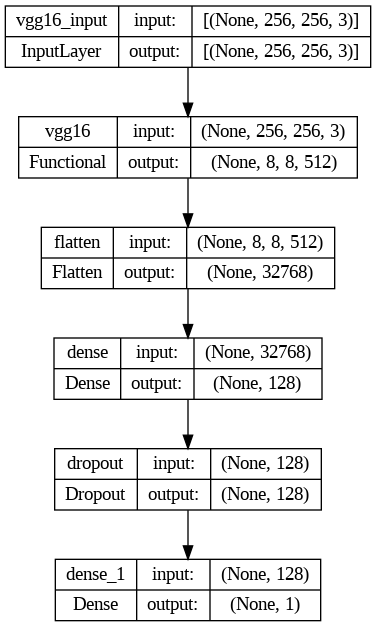

In [21]:
keras.utils.plot_model(model, show_shapes=True)

In [25]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
import tensorflow as tf

# Load the train and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),  # Resize images to match the model's input shape
    shuffle=True
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validate_dir,
    label_mode='int',
    batch_size=32,
    image_size=(256, 256),  # Resize images to match the model's input shape
    shuffle=False
)

# Define your model
model = ...

# Compile your model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train your model
history = model.fit(train_ds, epochs=10, validation_data=val_ds)